# Лабораторная работа 6
Ануфриев Семен Михайлович

In [1]:
import os

import pandas as pd
import requests
from plotly import __version__
from plotly import graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot

print(__version__)  # need 1.9.0 or greater

init_notebook_mode(connected=True)


def plotly_df(df, title=""):
    data = []

    for column in df.columns:
        trace = go.Scatter(x=df.index, y=df[column], mode="lines", name=column)
        data.append(trace)

    layout = dict(title=title)
    fig = dict(data=data, layout=layout)
    iplot(fig, show_link=False)

5.18.0


# Подготавливаем данные

In [2]:
df = pd.read_csv("lr6.csv", sep=" ")
df

,date,count,lang,page,rank,month,title
81,2015-01-01,1414,en,Machine_learning,8708,201501,Machine_learning
80,2015-01-02,1920,en,Machine_learning,8708,201501,Machine_learning
79,2015-01-03,1338,en,Machine_learning,8708,201501,Machine_learning
78,2015-01-04,1404,en,Machine_learning,8708,201501,Machine_learning
77,2015-01-05,2264,en,Machine_learning,8708,201501,Machine_learning
...,...,...,...,...,...,...,...
382,2016-01-16,1644,en,Machine_learning,8708,201601,Machine_learning
381,2016-01-17,1836,en,Machine_learning,8708,201601,Machine_learning
376,2016-01-18,2983,en,Machine_learning,8708,201601,Machine_learning
375,2016-01-19,3389,en,Machine_learning,8708,201601,Machine_learning


In [3]:
df = pd.read_csv("lr6.csv", sep=" ")
df = df[df["count"] != 0]
df =df.reset_index()
df=df.drop(columns=['index'])
df.head()

,date,count,lang,page,rank,month,title
0,2015-01-01,1414,en,Machine_learning,8708,201501,Machine_learning
1,2015-01-02,1920,en,Machine_learning,8708,201501,Machine_learning
2,2015-01-03,1338,en,Machine_learning,8708,201501,Machine_learning
3,2015-01-04,1404,en,Machine_learning,8708,201501,Machine_learning
4,2015-01-05,2264,en,Machine_learning,8708,201501,Machine_learning


In [4]:
df.shape

(383, 7)

In [5]:
df.date = pd.to_datetime(df.date)

In [6]:
plotly_df(df.set_index("date")[["count"]])

# Предсказание с помощью Facebook Prophet

In [7]:
from prophet import Prophet

/home/senya/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



In [8]:
predictions = 30

df = df[["date", "count"]]
df.columns = ["ds", "y"]
train_df = df[:-predictions].copy()

Вопрос 1: Какое предсказание числа просмотров wiki-страницы на 20 января? Ответ округлите до целого числа.

In [57]:
df

,ds,y
0,2015-01-01,1414
1,2015-01-02,1920
2,2015-01-03,1338
3,2015-01-04,1404
4,2015-01-05,2264
...,...,...
378,2016-01-16,1644
379,2016-01-17,1836
380,2016-01-18,2983
381,2016-01-19,3389


In [114]:
m = Prophet()
m.fit(train_df)

01:46:35 - cmdstanpy - INFO - Chain [1] start processing


01:46:36 - cmdstanpy - INFO - Chain [1] done processing


In [115]:
future = m.make_future_dataframe(periods=predictions)
forecast = m.predict(future)

/home/senya/.local/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/home/senya/.local/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



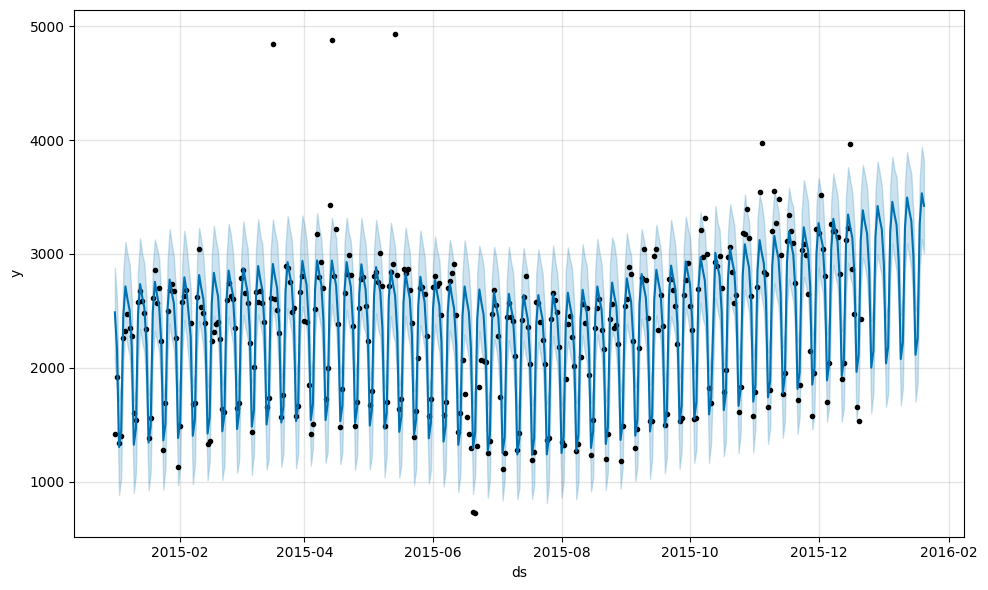

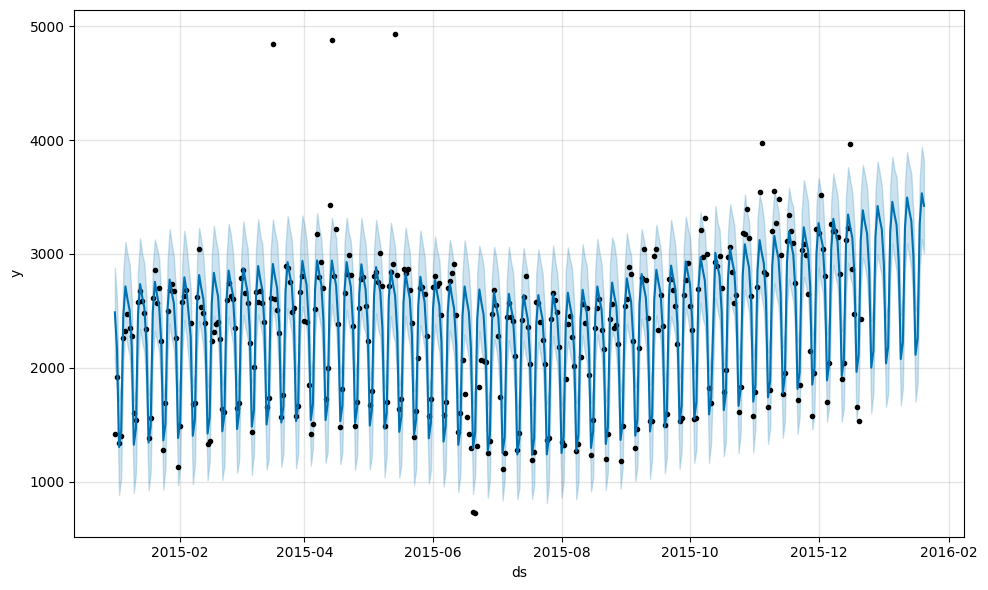

In [116]:
m.plot(forecast)

In [117]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01,2159.362764,2052.749654,2881.458244,2159.362764,2159.362764,327.001563,327.001563,327.001563,327.001563,327.001563,327.001563,0.0,0.0,0.0,2486.364327
1,2015-01-02,2162.192018,1781.005637,2605.403740,2162.192018,2162.192018,7.092804,7.092804,7.092804,7.092804,7.092804,7.092804,0.0,0.0,0.0,2169.284822
2,2015-01-03,2165.021273,881.652846,1712.895512,2165.021273,2165.021273,-861.672644,-861.672644,-861.672644,-861.672644,-861.672644,-861.672644,0.0,0.0,0.0,1303.348628
3,2015-01-04,2167.850527,1028.822926,1882.955297,2167.850527,2167.850527,-720.693920,-720.693920,-720.693920,-720.693920,-720.693920,-720.693920,0.0,0.0,0.0,1447.156607
4,2015-01-05,2170.679781,2040.501824,2842.964747,2170.679781,2170.679781,281.401813,281.401813,281.401813,281.401813,281.401813,281.401813,0.0,0.0,0.0,2452.081595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,2016-01-16,2974.978572,1702.580495,2501.435609,2957.497275,2994.361601,-861.672644,-861.672644,-861.672644,-861.672644,-861.672644,-861.672644,0.0,0.0,0.0,2113.305928
379,2016-01-17,2980.317007,1863.309592,2683.181926,2961.619135,3000.702236,-720.693920,-720.693920,-720.693920,-720.693920,-720.693920,-720.693920,0.0,0.0,0.0,2259.623088
380,2016-01-18,2985.655442,2868.372549,3667.228811,2965.609195,3007.590282,281.401813,281.401813,281.401813,281.401813,281.401813,281.401813,0.0,0.0,0.0,3267.057256
381,2016-01-19,2990.993878,3130.809328,3939.534550,2969.378052,3014.061757,541.384817,541.384817,541.384817,541.384817,541.384817,541.384817,0.0,0.0,0.0,3532.378695


/home/senya/.local/lib/python3.10/site-packages/prophet/plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



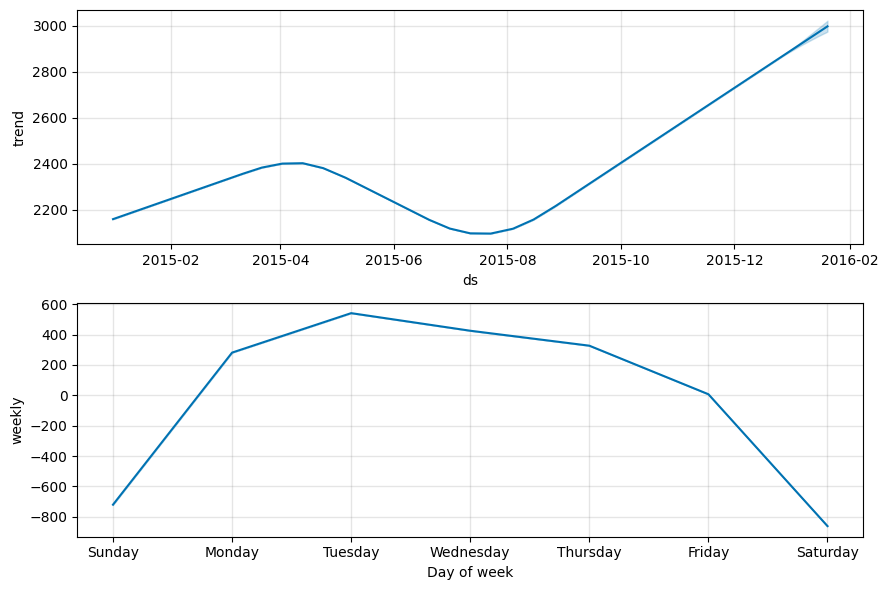

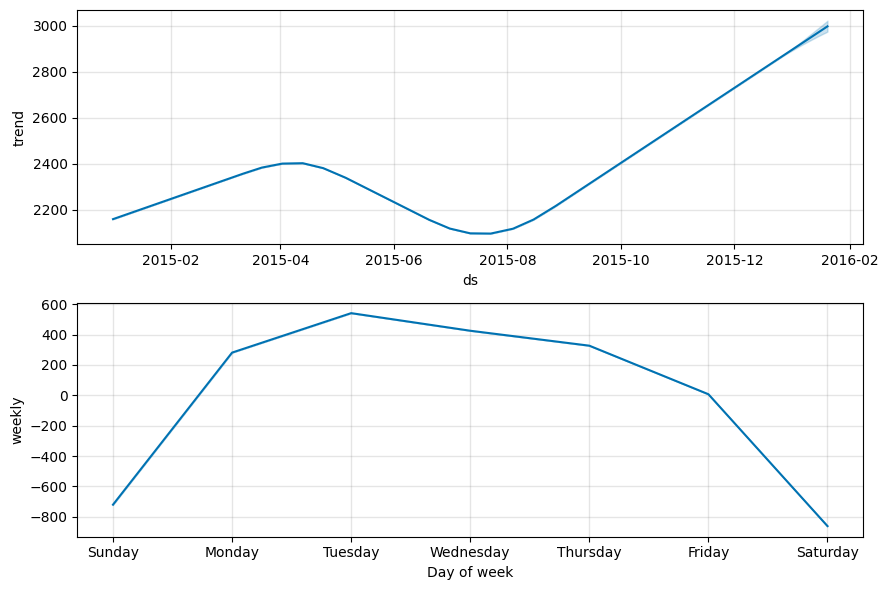

In [118]:
m.plot_components(forecast)

In [119]:
cmp_df = forecast.set_index('ds')[['yhat','yhat_lower','yhat_upper']].join(df.set_index('ds'))

In [120]:
import numpy as np

cmp_df['e'] = cmp_df['y'] - cmp_df['yhat']
cmp_df['p'] = 100*cmp_df['e']/cmp_df['y']
print ('MAPE', np.mean(abs(cmp_df[-predictions:]['p'])))
print ('MAE', np.mean(abs(cmp_df[-predictions:]['e'])))

MAPE 34.34570128132223
MAE 596.5328223327066


Предсказание на 20 января

In [124]:
print("Предсказание на 20 января: ", forecast[forecast['ds']=='2016-01-20']['yhat'])
print("Настоящее значение 20 января: ", df[df['ds']=='2016-01-20']['y'])
print("Разница: ", df[df['ds']=='2016-01-20']['y'] - forecast[forecast['ds']=='2016-01-20']['yhat'])

Предсказание на 20 января:  382    3421.817881
Name: yhat, dtype: float64
Настоящее значение 20 января:  382    3559
Name: y, dtype: int64
Разница:  382    137.182119
dtype: float64


In [82]:

# функция для визуализации построенного прогноза
def show_forecast(cmp_df, num_predictions, num_values):
    # верхняя граница доверительного интервала прогноза
    upper_bound = go.Scatter(
        name='Upper Bound',
        x=cmp_df.tail(num_predictions).index,
        y=cmp_df.tail(num_predictions).yhat_upper,
        mode='lines',
        marker=dict(color="blue"),
        line=dict(width=0),
        fillcolor='rgba(68, 68, 68, 0.3)',
        fill='tonexty')

    # прогноз
    forecast = go.Scatter(
        name='Prediction',
        x=cmp_df.tail(predictions).index,
        y=cmp_df.tail(predictions).yhat,
        mode='lines',
        line=dict(color='rgb(31, 119, 180)'),
    )

    # нижняя граница доверительного интервала
    lower_bound = go.Scatter(
        name='Lower Bound',
        x=cmp_df.tail(num_predictions).index,
        y=cmp_df.tail(num_predictions).yhat_lower,
        marker=dict(color="blue"),
        line=dict(width=0),
        mode='lines')

    # фактические значения
    fact = go.Scatter(
        name='Fact',
        x=cmp_df.tail(num_values).index,
        y=cmp_df.tail(num_values).y,
        marker=dict(color="red"),
        mode='lines',
    )

    # последовательность рядов в данном случае важна из-за применения заливки
    data = [lower_bound, upper_bound, forecast, fact]

    layout = go.Layout(
        yaxis=dict(title='Посты'),
        title='Ys',
        showlegend = False)

    fig = go.Figure(data=data, layout=layout)
    iplot(fig, show_link=False)

show_forecast(cmp_df, predictions, 200)

# Предсказываем с помощью ARIMA

In [83]:
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

# Проверим ряд на стационарность

In [84]:
from statistics import variance

print(f"Среднее:",round(df['y'].mean(),3))
print(f"Дисперсия",round(variance(df['y']),3))
print("\n")

Среднее: 2337.533
Дисперсия 435655.328




In [85]:
# Определяем функцию для проверки стационарности
def check_stationarity(x, alpha=0.05):
    # Применяем тест Дики-Фуллера к выборке x
    test_stat, p_value, _, _, _, _ = sm.tsa.stattools.adfuller(x)
    # Сравниваем p-значение с уровнем значимости alpha
    if p_value < alpha:
        # Если p-значение меньше alpha, то ряд стационарен
        print(f"Выборка x является стационарной. p-значение = {p_value}")
    else:
        # Если p-значение больше или равно alpha, то ряд нестационарен
        print(f"Выборка x не является стационарной. p-значение = {p_value}")

In [86]:
check_stationarity(df['y'])
sm.tsa.stattools.adfuller(df['y'])

Выборка x является стационарной. p-значение = 0.015383668419468997


(-3.288863638943115,
 0.015383668419468997,
 15,
 367,
 {'1%': -3.448294490928673,
  '5%': -2.869447722240253,
  '10%': -2.570982681065269},
 5332.027068742607)

In [87]:
check_stationarity(train_df['y'])
sm.tsa.stattools.adfuller(train_df['y'])

Выборка x не является стационарной. p-значение = 0.10739219627612118


(-2.5341178434183003,
 0.10739219627612118,
 15,
 337,
 {'1%': -3.4499043309021955,
  '5%': -2.870154885338925,
  '10%': -2.5713597190254385},
 4878.896813791136)

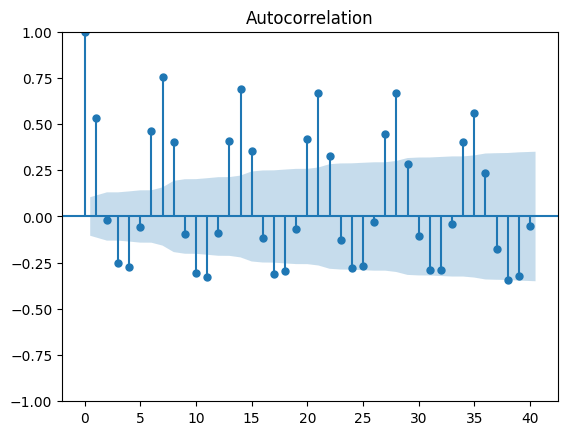

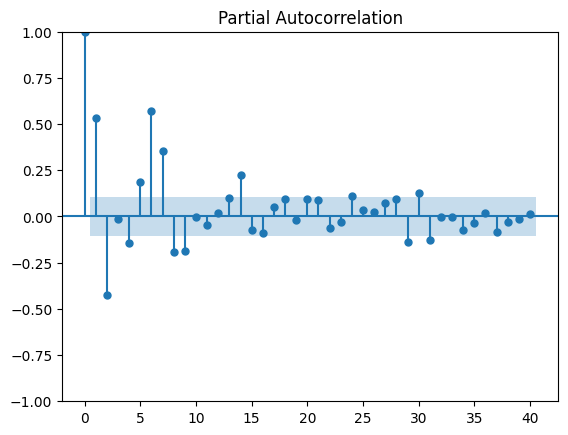

In [88]:
sm.graphics.tsa.plot_acf(train_df["y"], lags=40)
plt.show()
sm.graphics.tsa.plot_pacf(train_df["y"], lags=40)
plt.show()

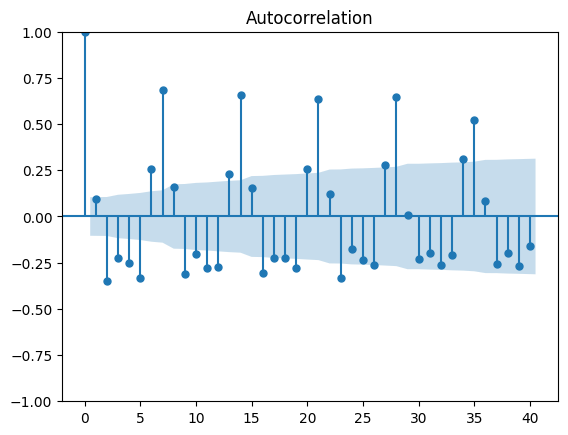

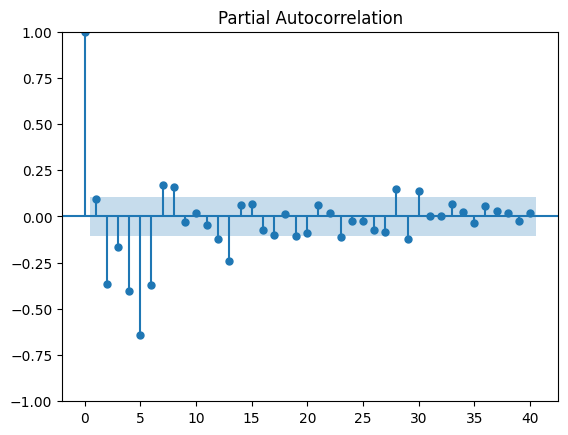

In [89]:
y_diff = np.diff(train_df["y"])
sm.graphics.tsa.plot_acf(y_diff, lags=40)
plt.show()
sm.graphics.tsa.plot_pacf(y_diff, lags=40)
plt.show()

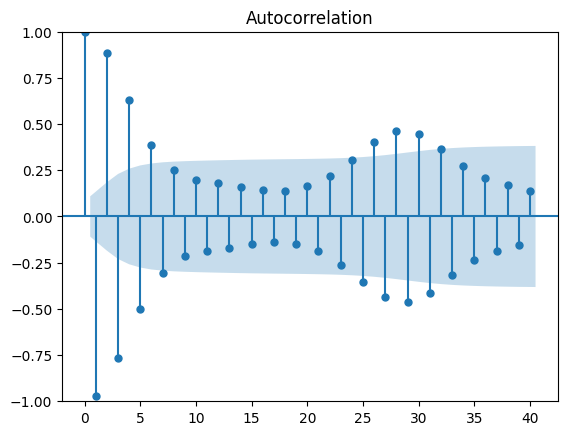

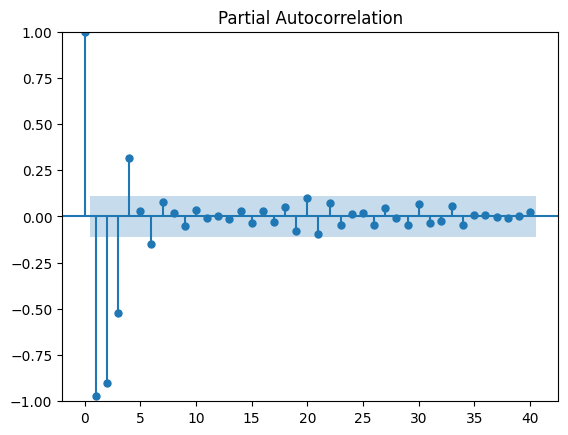

In [90]:
y_seasonal_diff = np.diff(train_df["y"], 30)
sm.graphics.tsa.plot_acf(y_seasonal_diff, lags=40)
plt.show()
sm.graphics.tsa.plot_pacf(y_seasonal_diff, lags=40)
plt.show()

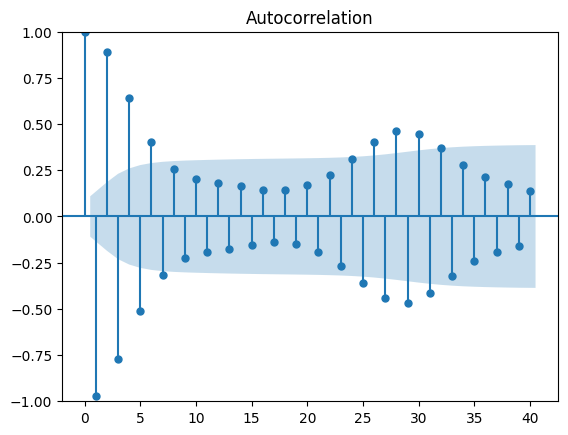

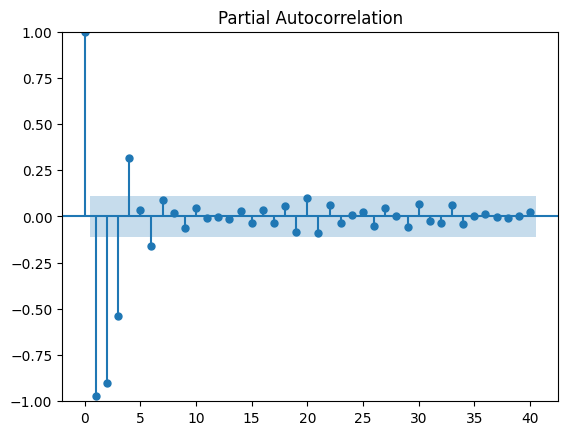

In [91]:
y_seasonal_first_diff = np.diff(y_seasonal_diff)
sm.graphics.tsa.plot_acf(y_seasonal_first_diff, lags=40)
plt.show()
sm.graphics.tsa.plot_pacf(y_seasonal_first_diff, lags=40)
plt.show()

In [92]:
d = 1
D = 1

p = 2
P = 1

q = 1
Q = 1

In [93]:
model = sm.tsa.statespace.SARIMAX(train_df["y"], order=(p,d,q), seasonal_order=(P,D,Q,12))

In [94]:
model_fit = model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.74226D+00    |proj g|=  2.41712D-01


 This problem is unconstrained.



At iterate    5    f=  7.61117D+00    |proj g|=  9.14789D-02

At iterate   10    f=  7.59640D+00    |proj g|=  1.81597D-02

At iterate   15    f=  7.59215D+00    |proj g|=  9.10086D-04

At iterate   20    f=  7.59092D+00    |proj g|=  1.16331D-02

At iterate   25    f=  7.45893D+00    |proj g|=  3.67784D-01

At iterate   30    f=  7.36405D+00    |proj g|=  7.77578D-03

At iterate   35    f=  7.36265D+00    |proj g|=  1.08258D-03

At iterate   40    f=  7.36264D+00    |proj g|=  1.89260D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43     46      1     0     0   6.382D-06   7.363D+00
  F =   7.36264031102

In [95]:
print(model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  353
Model:             SARIMAX(2, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -2599.012
Date:                            Sat, 25 Nov 2023   AIC                           5210.024
Time:                                    01:39:34   BIC                           5232.998
Sample:                                         0   HQIC                          5219.178
                                            - 353                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7320      0.042     17.436      0.000       0.650       0.814
ar.L2         -0.5092      0.048   

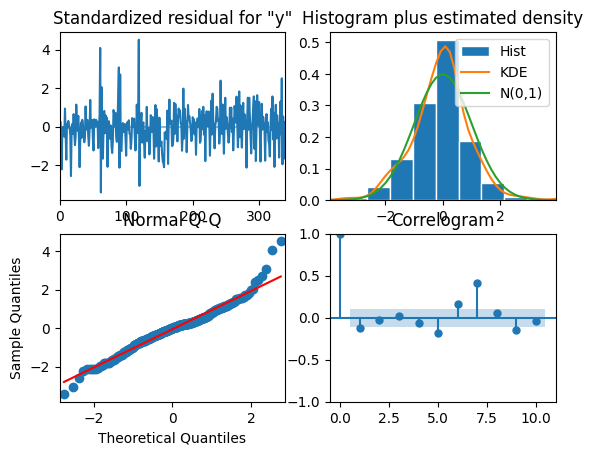

In [96]:
model_fit.plot_diagnostics()
plt.show()

In [97]:
forecast = model_fit.get_forecast(30)

In [98]:
print(forecast.predicted_mean)
print(forecast.conf_int())

353    3076.495273
354    2989.915367
355    3027.871923
356    2708.070708
357    2530.010265
358    2633.408701
359    2485.994827
360    2744.397077
361    2822.314112
362    3012.936135
363    2957.277802
364    2809.366989
365    2755.028756
366    2638.374512
367    2706.094140
368    2702.792367
369    2854.247780
370    2857.359627
371    2872.447097
372    2770.288171
373    2758.733284
374    2709.368225
375    2636.729427
376    2751.596794
377    2874.407366
378    2764.865701
379    2829.151332
380    2745.636554
381    2810.166352
382    2838.304552
Name: predicted_mean, dtype: float64
         lower y      upper y
353  2119.646595  4033.343950
354  1761.749611  4218.081124
355  1791.076129  4264.667716
356  1452.604154  3963.537263
357  1264.047448  3795.973081
358  1366.016855  3900.800547
359  1203.468672  3768.520982
360  1448.937608  4039.856546
361  1522.759092  4121.869132
362  1712.344622  4313.527648
363  1655.524532  4259.031073
364  1504.951957  4113.782020
365

In [109]:
pred1 = model_fit.predict(start = 0, end = train_df.shape[0]+30)

In [110]:
pred1

0         0.000000
1      1465.499296
2      1754.728097
3      1069.594816
4      1411.579290
          ...     
379    2829.151332
380    2745.636554
381    2810.166352
382    2838.304552
383    2808.939597
Name: predicted_mean, Length: 384, dtype: float64

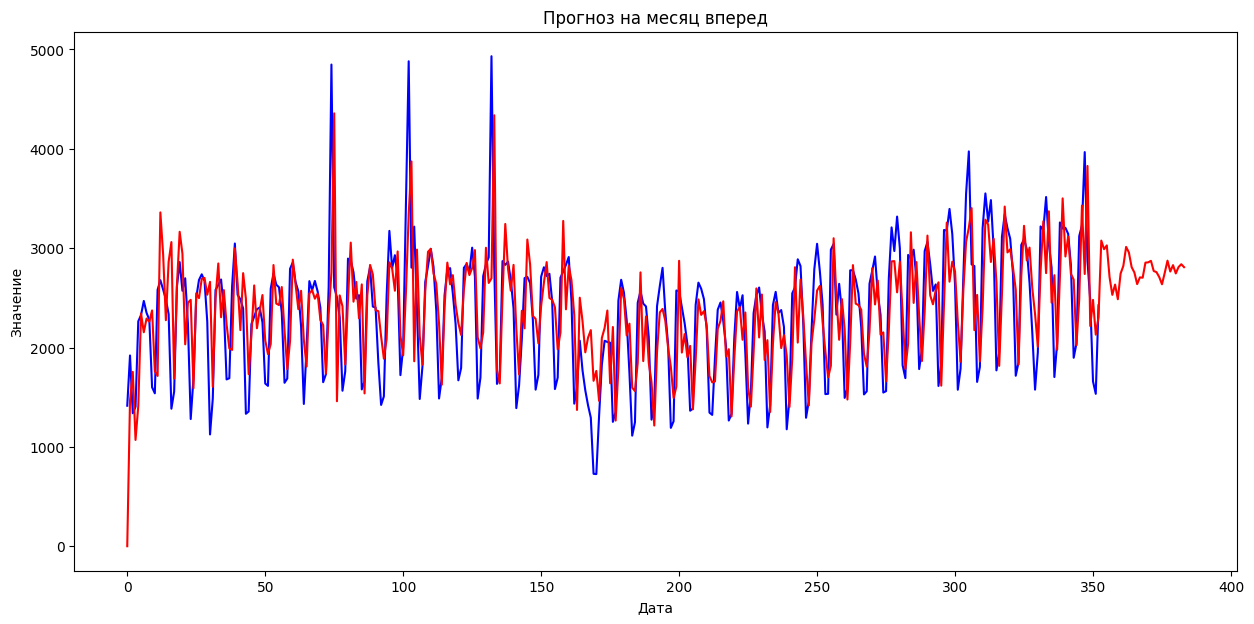

In [112]:
plt.figure(figsize=(15, 7))
plt.plot(train_df.y, color='b', label="true")
plt.plot(pred1, color='r', label="model")
plt.xlabel("Дата")
plt.ylabel("Значение")
plt.title("Прогноз на месяц вперед")
plt.show()

# SARIMAX с подобором наилучших гиперапараметров

Критерий Дики-Фуллера: p=0.107392


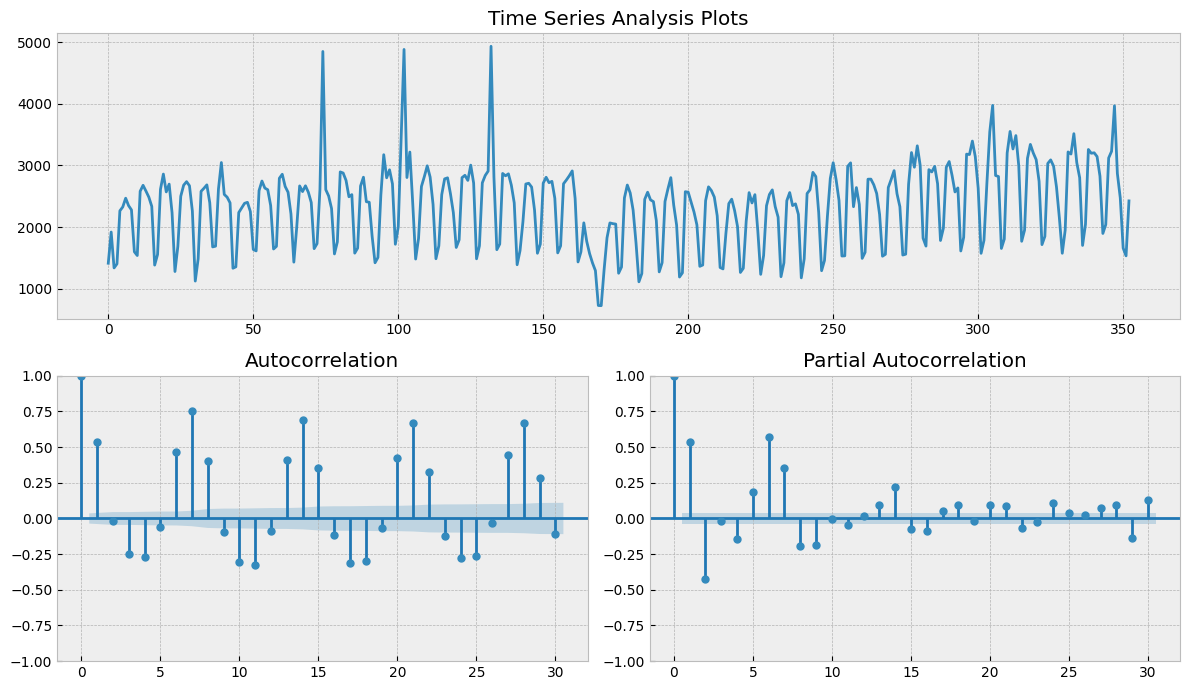

In [36]:
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))

        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)

        print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(y)[1])

        plt.tight_layout()
    return 

tsplot(train_df.y, lags=30)

Критерий Дики-Фуллера: p=0.116981
Оптимальный параметр преобразования Бокса-Кокса: 0.732733


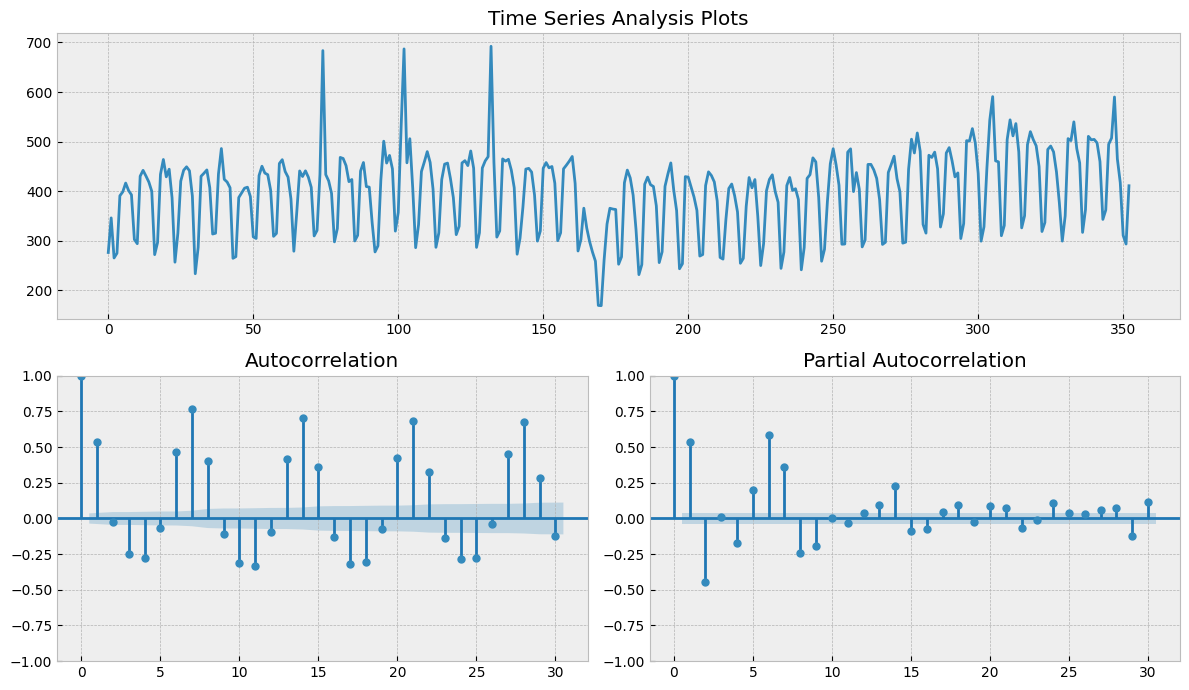

In [37]:
import scipy.stats as scs
def invboxcox(y,lmbda):
    # обрабтное преобразование Бокса-Кокса
    if lmbda == 0:
        return(np.exp(y))
    else:
        return(np.exp(np.log(lmbda*y+1)/lmbda))

data = train_df.copy()
data['y_box'], lmbda = scs.boxcox(data.y+1) # прибавляем единицу, так как в исходном ряде есть нули
tsplot(data.y_box, lags=30)
print("Оптимальный параметр преобразования Бокса-Кокса: %f" % lmbda)

Критерий Дики-Фуллера: p=0.001971


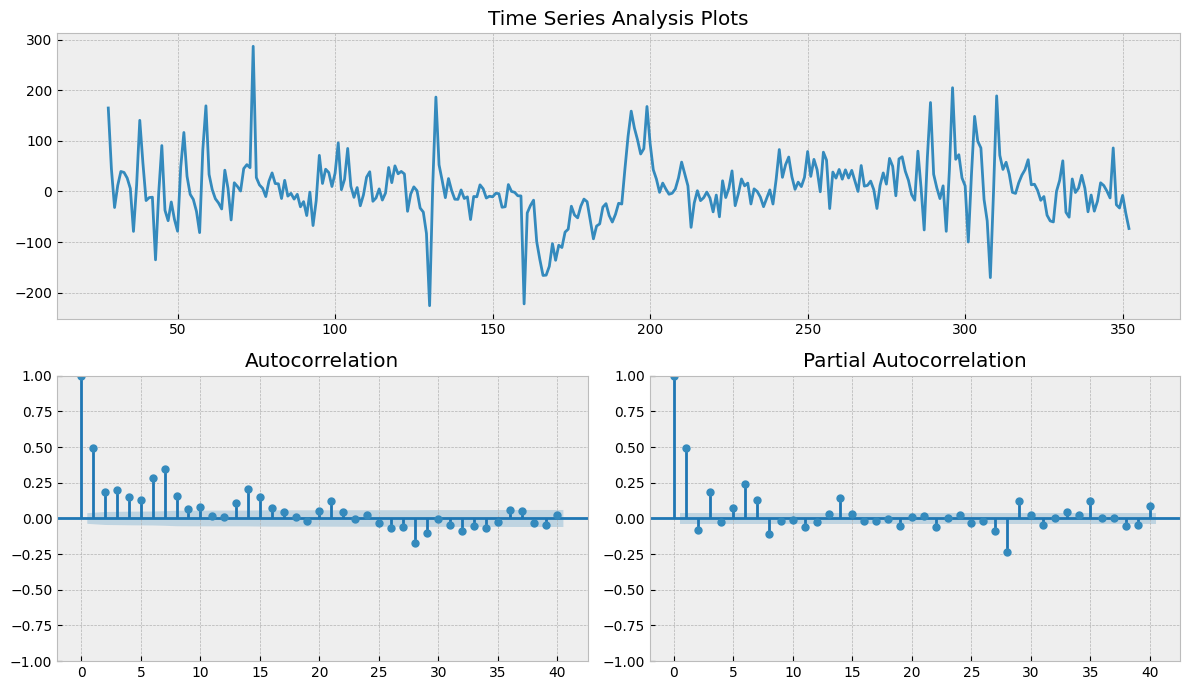

In [38]:
data['y_box_season'] = data.y_box - data.y_box.shift(28)
tsplot(data.y_box_season[28:], lags=40)

Получаем стационарную выборку

Критерий Дики-Фуллера: p=0.000000


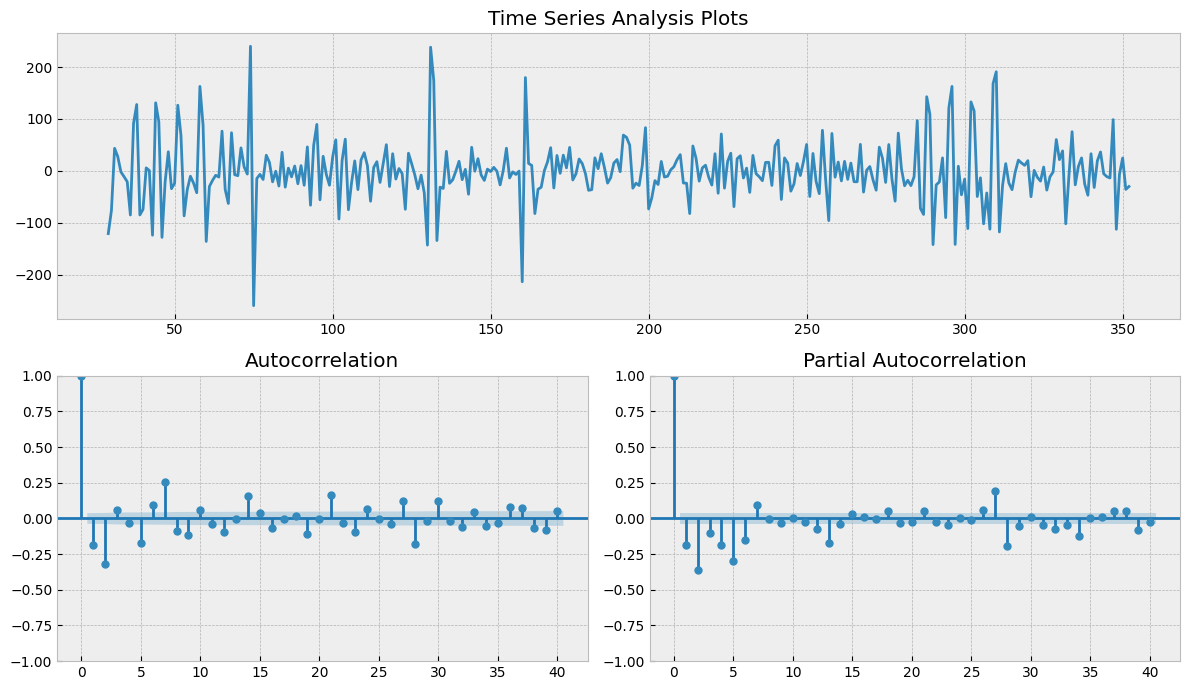

In [39]:
data['y_box_season_diff'] = data.y_box_season - data.y_box_season.shift(1)
tsplot(data.y_box_season_diff[28+1:], lags=40)

In [40]:
ps = range(0, 5)
d=1
qs = range(0, 4)
Ps = range(0, 5)
D=1
Qs = range(0, 1)

from itertools import product

parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

100

In [48]:
%%time
import warnings
from tqdm import tqdm
results = []
best_aic = float("inf")

for param in tqdm(parameters_list):
    #try except нужен, потому что на некоторых наборах параметров модель не обучается
    try:
        model=sm.tsa.statespace.SARIMAX(data.y_box, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 28)).fit(disp=-1)
    #выводим параметры, на которых модель не обучается и переходим к следующему набору
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    #сохраняем лучшую модель, aic, параметры
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

warnings.filterwarnings('default')

result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

 70%|███████   | 70/100 [30:48<22:01, 44.06s/it]/home/senya/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/home/senya/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 71%|███████   | 71/100 [30:49<14:59, 31.01s/it]/home/senya/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/home/senya/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

 72%|███████▏  | 72/100 [30:55<10:58, 23.53s/it]/home/senya/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.p

      parameters          aic
99  (4, 3, 4, 0)  3426.990938
98  (4, 3, 3, 0)  3428.773731
97  (4, 3, 2, 0)  3434.490440
94  (4, 2, 4, 0)  3436.301605
93  (4, 2, 3, 0)  3439.198784
CPU times: user 4h 52min 44s, sys: 9h 52min 50s, total: 14h 45min 34s
Wall time: 55min 35s


Лучшие параметры - 4,3,4,0 / минимальный критерий aic = 3426.99. Оставшиеся параметры определены изменением стационарности ряда и D=1 тк ряд стационарен после вторых разностей. 28 - месячный период.

In [ ]:

best_model = sm.tsa.statespace.SARIMAX(data.y_box, order=(4, d, 3), 
                                        seasonal_order=(4, D, 0, 28)).fit(disp=-1)                                   

Критерий Дики-Фуллера: p=0.000000


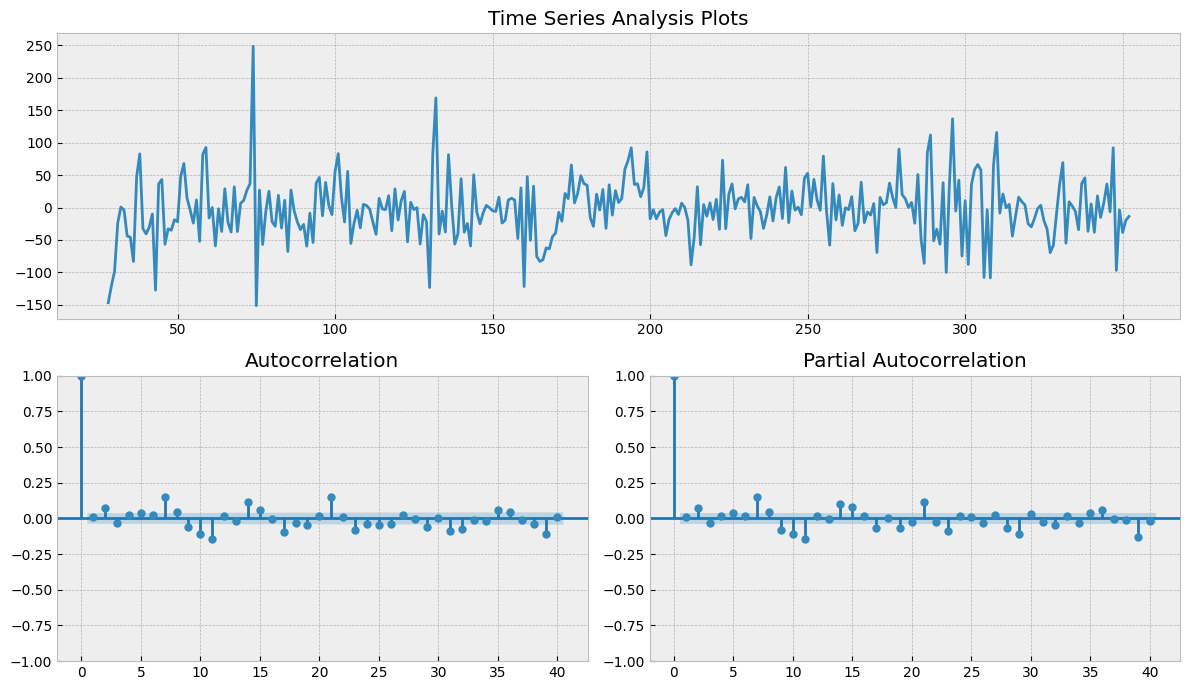

In [50]:
tsplot(best_model.resid[28:], lags=40)

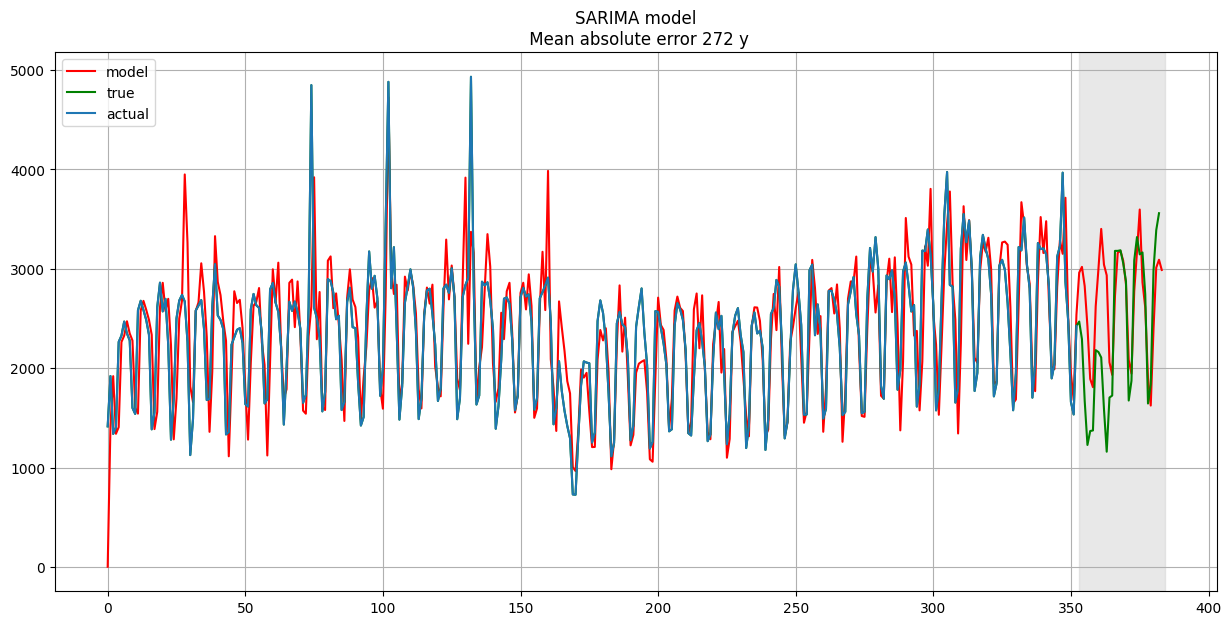

In [56]:
from sklearn. metrics import mean_absolute_error
data["arima_model"] = invboxcox(best_model.fittedvalues, lmbda)
forecast = invboxcox(best_model.predict(start = data.shape[0], end = data.shape[0]+30), lmbda)
forecast = data.arima_model._append(forecast).values[-500:]
actual = data.y.values[-400:]
plt.figure(figsize=(15, 7))
plt.plot(forecast, color='r', label="model")
plt.plot(df.y,color='g',label = 'true')
plt.title("SARIMA model\n Mean absolute error {} y".format(round(mean_absolute_error(data.dropna().y, data.dropna().arima_model))))
plt.plot(actual, label="actual")
plt.legend()
plt.axvspan(len(actual), len(forecast), alpha=0.5, color='lightgrey')
plt.grid(True)